In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,matthews_corrcoef


In [2]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df['Age'].value_counts()

Age
9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df['Diabetes_binary'] = df['Diabetes_012'].apply(lambda x: 0 if x == 0 else 1)

In [6]:
df['Diabetes_binary'].value_counts(normalize=True)

Diabetes_binary
0    0.842412
1    0.157588
Name: proportion, dtype: float64

In [7]:
X = df.drop(columns=["Diabetes_012", "Diabetes_binary"])
y = df["Diabetes_binary"]

In [8]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Output shapes
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels distribution:\n", y_train.value_counts(normalize=True))
print("Test labels distribution:\n", y_test.value_counts(normalize=True))

Training features shape: (202944, 21)
Test features shape: (50736, 21)
Training labels distribution:
 Diabetes_binary
0    0.84241
1    0.15759
Name: proportion, dtype: float64
Test labels distribution:
 Diabetes_binary
0    0.84242
1    0.15758
Name: proportion, dtype: float64


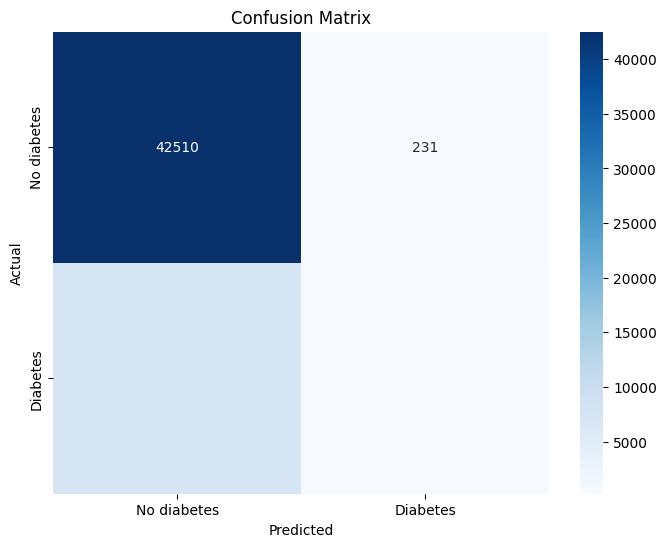

{'max_depth': 6, 'max_samples': 0.8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
MCC: 0.16743991672724237
accuracy: 0.8471893724377169
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     42741
           1       0.67      0.06      0.11      7995

    accuracy                           0.85     50736
   macro avg       0.76      0.53      0.51     50736
weighted avg       0.82      0.85      0.79     50736



In [11]:
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100],  # or [50, 100]
    'max_depth': [4, 6],    # instead of range(3, 8)
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 3],
    'max_samples': [0.8]    # drop 0.6 and 1.0 for now
}

# Using GridSearchCV to find the best hyperparameters (with weather data)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters from GridSearch
best_params = grid_search_rf.best_params_

# params_given = {'max_depth': 4, 'max_samples': 0.6, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
# Building the Random Forest model with the best parameters
model_rf = RandomForestClassifier(**best_params, random_state=42)
model_rf.fit(X_train, y_train)

# Predicting on the test data
y_pred = model_rf.predict(X_test)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'Diabetes'], yticklabels=['No diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)

In [12]:
cm

array([[42510,   231],
       [ 7522,   473]], dtype=int64)

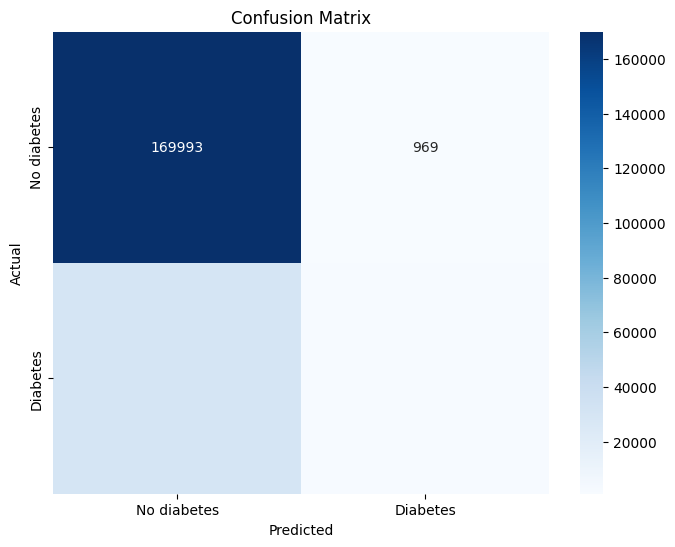

{'max_depth': 6, 'max_samples': 0.8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
MCC: 0.16483812570318723
accuracy: 0.8469232891832229
              precision    recall  f1-score   support

           0       0.85      0.99      0.92    170962
           1       0.66      0.06      0.11     31982

    accuracy                           0.85    202944
   macro avg       0.76      0.53      0.51    202944
weighted avg       0.82      0.85      0.79    202944



In [13]:
# Predicting on the test data
y_train_pred = model_rf.predict(X_train)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
classification_report_output = classification_report(y_train, y_train_pred)

cm = confusion_matrix(y_train, y_train_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'Diabetes'], yticklabels=['No diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)